# **Support Vector Machine (SVM)**

***SVM is a machine learning algorithm used for classification and regression tasks. However, it is mostly used for classification problems.***

## **Goal of SVM:**

***SVM aims to find the best boundary (decision boundary or hyperplane) that seperates different classes of data points in a dataset. This boundary helps predict the class of new data points***

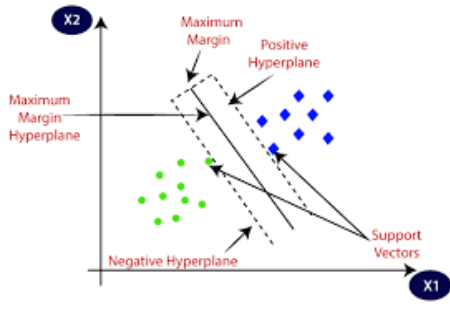

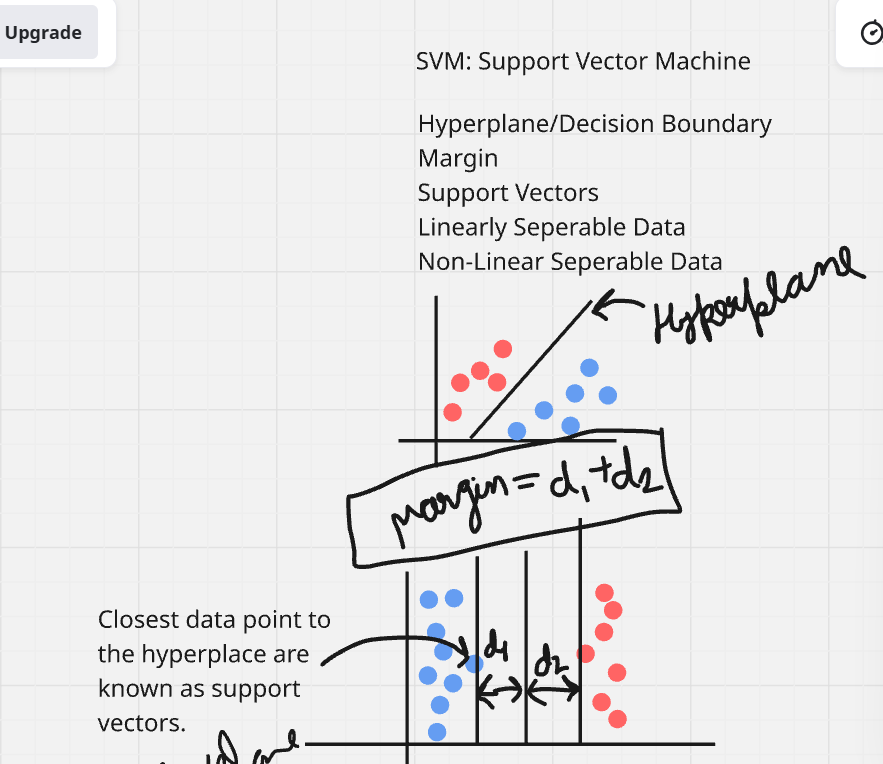

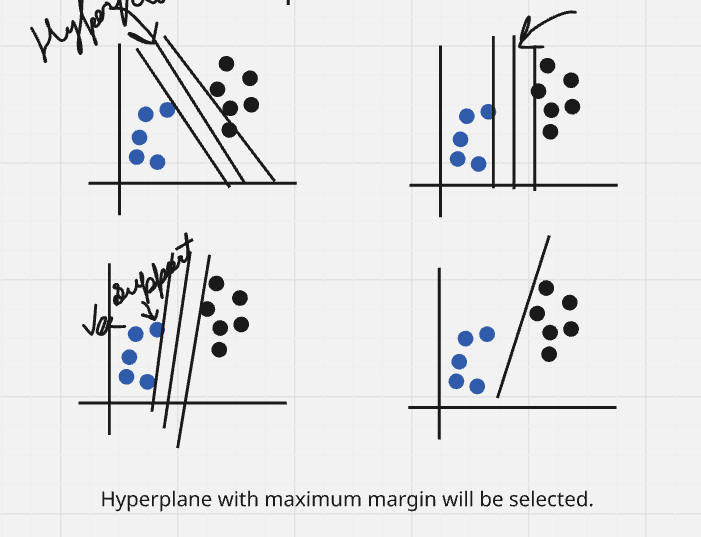

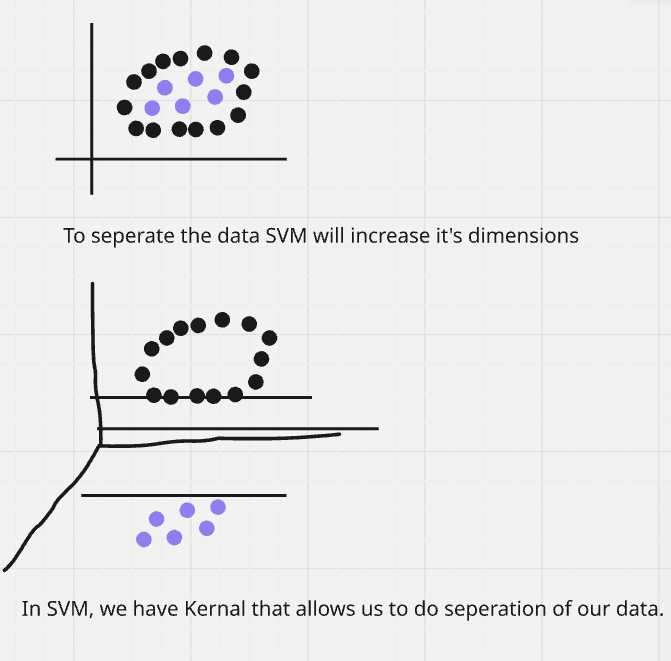

# **How SVM WORKS:**

***Think of SVM as a way to draw a line (or a surface in higher dimensions) that splits data points into two groups.***

***It chooses the line that is as far as possible from the nearest data points of each group (Maximum Margim). These nearest points are called support vectors because they "support" the boundary.***

## **Key Terms in SVM:**


1.   **Hyperplane:** The decision boundary that seperate the classes.
2.   **Margin:** The distance between hyperplane and the nearest data points from each class. SVM tries to maximise this margin to make the seperation robust.



# **Advantages and Disadvantages of SVM**

**Advantages:**

Effective in high-dimensional spaces: Works well for datasets with large numbers of features.

Robust to Overfitting: Particulary effective in scenarioes where the number of samples are smaller than the numbers of features.

Works well with clear margins: Suitable when classes are clearly seperable.

**Disadvantages:**

Computational Complexity: Training can be slow for large datasets.

Not suited for large datasets: Performance degrades as the dataset size increases.

Choosing the right kernel: Selecting the correct kernal and hyperparameters requires experimentation.

No direct probabilistic interpretation: Unlike logistic regression, it doesn't provide probabilities directly.

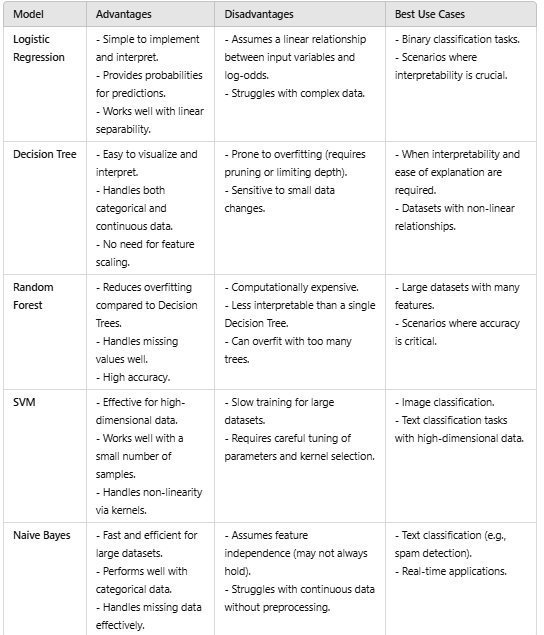

**Key Takeaways:**

***Logistic Regression:*** Best for Binary Classification and secaniores requiring interpretability.

***Decision Tree:*** Good for non-linear problems, but needs pruning to avoid overfitting.


***Random Forest:*** Balanced bias and variance effictively and works well for large datasets.


***SVM:*** Ideal for high-dimensional, small datasets but computationally intensive.


***Naive Bayes:*** Excellent for text-based tasks with categorical data.

# **Kernal IN SVM**

1. ***Linear Kernal:*** The data that can be seperated via straight line. (Linearly Seperable)

2. ***Polynomial Kernal:*** Used when data can be seperated via curved boundary.

3. ***Radial Basis Function(RBF) Kernal***:  When the data is very complex/messy and we don't know the right curve. We use RBF because it maps the data into high dimensions where a hyperplance can seperate it.

4. ***Sigmoid Kernal:*** This transforms the data like a neuron does in neural networks.

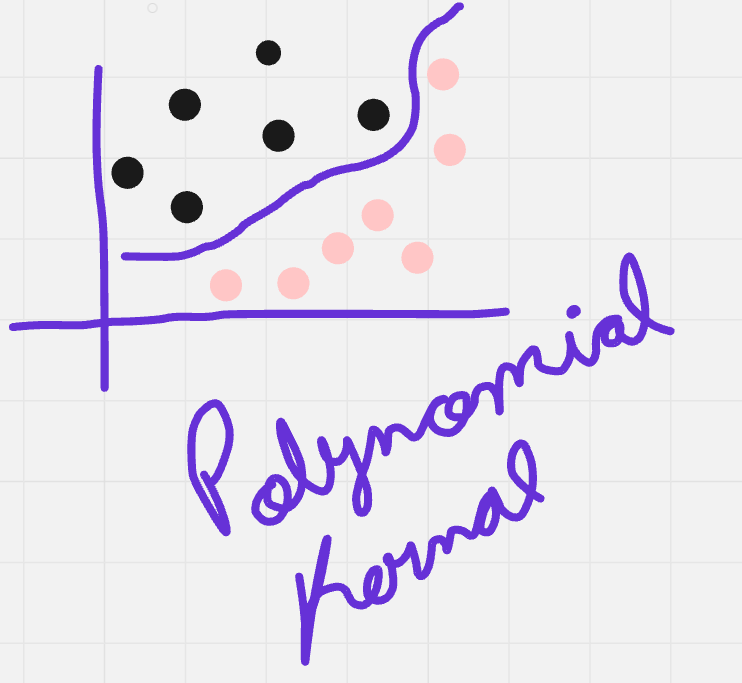</img>

# **SVM IMPLEMENTATION**

**Dataset URL:** https://drive.google.com/file/d/1nMiTsfMJOQUwWzSLvYOLi7iHCW7xPZe0/view?usp=drive_link

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/drug.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [ ]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [ ]:
# Check the basic info about the dataset, find the count of drugs in our target column
# encode all the categorical columns to numerical columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
df['Drug'].value_counts()

,count
Drug,
DrugY,91
drugX,54
drugA,23
drugC,16
drugB,16


In [ ]:
df['Sex'].value_counts()

,count
Sex,
M,104
F,96


In [ ]:
# label Encoding: Female -> 0 Male -> 1
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['M','F']])
df['Sex'] = oe.fit_transform(df[['Sex']])

In [ ]:
df['Sex'].value_counts()

,count
Sex,
0.0,104
1.0,96


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    float64
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 9.5+ KB


In [ ]:
df['Sex'] = df['Sex'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for x in df.columns:
    if df[x].dtype=='object':
        df[x] = le.fit_transform(df[x])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.5 KB


In [ ]:
from sklearn.svm import SVC
# SVC -> Support Vector Classifier
# SVR -> Support Vector Regressor
# Divide the data into 80:20 ratio and use SVM and build a machine learning model.

In [ ]:
X = df.drop(columns=['Drug'])
y = df['Drug']
print(X.shape)
print(y.shape)

(200, 5)
(200,)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(160, 5)

In [ ]:
x_test.shape

(40, 5)

In [ ]:
y_train.shape


(160,)

In [ ]:
model = SVC(C=100)

model.fit(x_train,y_train)

SVC(C=100)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import *

In [ ]:
accuracy_score(y_pred,y_test)

0.875